<a href="https://colab.research.google.com/github/shashi3876/CalculateCorrelation/blob/main/Part_2_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


In this notebook we will look in to the correlation among time series.
Correlation refers to a statistical relationship between two variables. In other words, it measures how two variables are related to each other.

Correlation can be positive, negative, or zero. Positive correlation means that as one variable increases, the other variable also tends to increase. Negative correlation means that as one variable increases, the other variable tends to decrease. Zero correlation means that there is no relationship between the variables.

The strength of the correlation between two variables is measured by the correlation coefficient, which ranges from -1 to +1. A correlation coefficient of +1 indicates a perfect positive correlation, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no correlation.

Correlation can be useful in identifying patterns and making predictions in a variety of fields, such as finance, marketing, and social science. However, it is important to remember that correlation does not imply causation, meaning that just because two variables are correlated does not mean that one causes the other.

#Data Collection

We will use real stock prices for several companies to analyze the correlation among them. Here, we will use the free API provided by Alpha Vantage to gather data. It provides both free APIs and premium APIs. You can obtain your own API Key from Alpha Vantage by providing your name and email. We will limit ourselves to the TIME SERIES DAILY ADJUSTED API which provide daily updates on the stock prices for the requested symbol. Here we use outputsize=full to obtain stock prices for the last 20 years. But we will limit our analysis to the prices during the last year. Outputsize=compact (the default value) will provide the stock prices for only the last 100 days and you can choose this option if you want a lesser number of data points. 



In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

companies={'Apple':'AAPL','Amazon':'AMZN','Facebook':'META','Tesla':'TSLA','Alphabet (Google)':'GOOGL','Shell':'SHEL','Suncor Energy':'SU',
           'Exxon Mobil Corp':'XOM','Lululemon':'LULU','Walmart':'WMT','Carters':'CRI','Childrens Place':'PLCE','TJX Companies':'TJX',
           'Victorias Secret':'VSCO','MACYs':'M','Wayfair':'W','Dollar Tree':'DLTR','CVS Caremark':'CVS','Walgreen':'WBA','Curaleaf':'CURLF'}


I selected 20 companies from Tech, Retail, Oil and Gas, and other industries . Below is a list of the companies and a brief description along with the stock tracker symbol:
## List of stock trackers

1. Apple (AAPL): A technology company that designs and sells consumer electronics, computer software, and online services.
2. Amazon (AMZN): An online retailer that sells a variety of products and services, including books, electronics, and streaming video.
3. Facebook (META): A social networking company that connects people with friends and family, and allows businesses to connect with customers.
4. Tesla (TSLA): An electric vehicle and renewable energy company that designs and manufactures high-performance electric cars, solar panels, and energy storage systems.
5. Alphabet (Google) (GOOGL): A technology company that provides internet-related services, including search engines, advertising, and cloud computing.
6. Shell (SHEL): An oil and gas company that explores, produces, and refines oil and natural gas.
7. Suncor Energy (SU): A Canadian integrated energy company that produces and refines oil and natural gas.
8. Exxon Mobil Corp (XOM): An oil and gas company that explores, produces, and sells crude oil, natural gas, and petroleum products.
9. Lululemon (LULU): A clothing company that designs and sells athletic apparel and accessories.
10. Walmart (WMT): A multinational retail corporation that operates a chain of discount department stores and grocery stores.
11. Carters (CRI): A clothing company that designs and sells clothing and accessories for babies and young children.
12. Childrens Place (PLCE): A clothing company that designs and sells clothing and accessories for children.
13. TJX Companies (TJX): A multinational off-price department store corporation that operates stores such as T.J. Maxx, Marshalls, and HomeGoods.
14. Victoria's Secret & Co (VSCO): A clothing and lingerie company that designs and sells women's clothing, lingerie, and beauty products.
15. Macy's (M): A department store company that sells clothing, accessories, and home goods.
16. Wayfair (W): An online retailer that sells furniture and home goods.
17. Dollar Tree (DLTR): A discount variety store that sells items for $1 or less.
18. CVS Caremark (CVS): A healthcare company that provides pharmacy and healthcare services, including prescription drugs, over-the-counter drugs, and healthcare clinics.
19. Walgreen (WBA): A pharmacy retail chain that sells prescription drugs, over-the-counter drugs, and health and wellness products.
20. Curaleaf Holdings Inc. (CURLF) is a cannabis and wellness company that operates in the United States and other international markets. 


In [54]:
import time
print(companies)
all_data={}
for key,value in companies.items():
  print(key)
# Replace YOUR_API_KEY with your Alpha Vantage API key
  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={value}&apikey=Y4F3CK7ZOJVUTKCS2&outputsize=full'

  response = requests.get(url)

  data = response.json()
  time.sleep(15)
  if 'Time Series (Daily)' in data and data['Time Series (Daily)']:
    df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    print(df['1. open'].head())
  else:
    print("Time series data is empty or not available.")
  df.rename(columns = {'1. open':key}, inplace = True)
  all_data[key]=df[key]
  #df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')  
  

{'Apple': 'AAPL', 'Amazon': 'AMZN', 'Facebook': 'META', 'Tesla': 'TSLA', 'Alphabet (Google)': 'GOOGL', 'Shell': 'SHEL', 'Suncor Energy': 'SU', 'Exxon Mobil Corp': 'XOM', 'Lululemon': 'LULU', 'Walmart': 'WMT', 'Carters': 'CRI', 'Childrens Place': 'PLCE', 'TJX Companies': 'TJX', 'Victorias Secret': 'VSCO', 'MACYs': 'M', 'Wayfair': 'W', 'Dollar Tree': 'DLTR', 'CVS Caremark': 'CVS', 'Walgreen': 'WBA', 'Curaleaf': 'CURLF'}
Apple
2023-03-10     150.21
2023-03-09    153.559
2023-03-08     152.81
2023-03-07      153.7
2023-03-06    153.785
Name: 1. open, dtype: object
Amazon
2023-03-10    92.67
2023-03-09    93.68
2023-03-08     93.6
2023-03-07    94.06
2023-03-06    95.19
Name: 1. open, dtype: object
Facebook
2023-03-10    181.01
2023-03-09    186.35
2023-03-08    182.87
2023-03-07     189.0
2023-03-06     188.0
Name: 1. open, dtype: object
Tesla
2023-03-10    175.13
2023-03-09    180.25
2023-03-08    185.04
2023-03-07    191.38
2023-03-06    198.54
Name: 1. open, dtype: object
Alphabet (Goog

Now we have a dictionary with all the opening prices of all the stocks we are interested in. Next step is to make a single data frame with all the common dates.

In [55]:
# find common dates among all data frames
common_dates = None
for df_key, df in all_data.items():
    if common_dates is None:
        common_dates = set(df.index)
    else:
        common_dates = common_dates.intersection(df.index)

common_dates = sorted(list(common_dates))

# create new data frame with common dates as index
df_combined = pd.DataFrame(index=common_dates)

# reindex each data frame with common dates and concatenate horizontally
for df_key, df in all_data.items():
    df_combined = pd.concat([df_combined, df.reindex(common_dates)], axis=1)

df_combined.head()

,Apple,Amazon,Facebook,Tesla,Alphabet (Google),Shell,Suncor Energy,Exxon Mobil Corp,Lululemon,Walmart,Carters,Childrens Place,TJX Companies,Victorias Secret,MACYs,Wayfair,Dollar Tree,CVS Caremark,Walgreen,Curaleaf
2021-07-21,145.53,3576.375,341.5,659.61,2522.67,36.74,20.7,56.86,383.2,142.5,98.9,83.28,67.07,55.0,17.09,296.45,99.09,82.44,46.26,13.0
2021-07-22,145.935,3587.23,346.68,656.4428,2556.88,37.2,21.07,57.73,383.75,141.13,97.03,86.76,67.62,42.75,17.54,290.3,99.11,82.71,46.52,12.94
2021-07-23,147.55,3640.0,360.91,646.36,2608.61,37.08,21.03,57.29,394.99,141.52,98.68,85.46,67.75,41.98,16.98,288.14,99.58,83.0,46.78,13.18
2021-07-26,148.27,3673.17,369.58,650.97,2666.565,37.36,20.81,57.16,402.57,142.36,103.955,87.31,67.95,40.2,16.75,284.53,100.09,83.43,46.53,12.95
2021-07-27,149.12,3698.5,371.91,663.4,2685.01,37.91,21.12,58.01,394.27,143.0,100.28,86.3,68.42,41.5,17.23,284.75,100.16,82.55,46.99,12.3


In [56]:
df_combined.sort_index(axis=0,inplace=True)
df_combined=df_combined.astype(float)
df_combined.isna().sum()


Apple                0
Amazon               0
Facebook             0
Tesla                0
Alphabet (Google)    0
Shell                0
Suncor Energy        0
Exxon Mobil Corp     0
Lululemon            0
Walmart              0
Carters              0
Childrens Place      0
TJX Companies        0
Victorias Secret     0
MACYs                0
Wayfair              0
Dollar Tree          0
CVS Caremark         0
Walgreen             0
Curaleaf             0
dtype: int64

In [57]:
df_combined

,Apple,Amazon,Facebook,Tesla,Alphabet (Google),Shell,Suncor Energy,Exxon Mobil Corp,Lululemon,Walmart,Carters,Childrens Place,TJX Companies,Victorias Secret,MACYs,Wayfair,Dollar Tree,CVS Caremark,Walgreen,Curaleaf
2021-07-21,145.530,3576.375,341.50,659.6100,2522.670,36.74,20.70,56.86,383.20,142.50,98.900,83.28,67.07,55.00,17.09,296.45,99.09,82.44,46.260,13.00
2021-07-22,145.935,3587.230,346.68,656.4428,2556.880,37.20,21.07,57.73,383.75,141.13,97.030,86.76,67.62,42.75,17.54,290.30,99.11,82.71,46.520,12.94
2021-07-23,147.550,3640.000,360.91,646.3600,2608.610,37.08,21.03,57.29,394.99,141.52,98.680,85.46,67.75,41.98,16.98,288.14,99.58,83.00,46.780,13.18
2021-07-26,148.270,3673.170,369.58,650.9700,2666.565,37.36,20.81,57.16,402.57,142.36,103.955,87.31,67.95,40.20,16.75,284.53,100.09,83.43,46.530,12.95
2021-07-27,149.120,3698.500,371.91,663.4000,2685.010,37.91,21.12,58.01,394.27,143.00,100.280,86.30,68.42,41.50,17.23,284.75,100.16,82.55,46.990,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06,153.785,95.190,188.00,198.5400,94.015,62.31,35.15,111.99,314.27,140.50,74.250,44.10,77.66,35.78,22.87,40.91,150.00,82.00,36.050,3.91
2023-03-07,153.700,94.060,189.00,191.3800,94.980,62.35,34.94,112.81,305.73,141.18,72.800,40.90,78.58,34.61,21.79,39.03,143.70,82.65,35.480,3.83
2023-03-08,152.810,93.600,182.87,185.0400,94.120,61.51,34.00,111.23,302.11,138.56,72.560,41.85,77.44,35.03,21.19,38.51,142.11,80.33,34.210,3.88
2023-03-09,153.559,93.680,186.35,180.2500,94.050,61.25,34.38,110.87,305.73,138.83,73.380,42.02,76.74,33.50,20.94,38.06,141.90,79.97,34.495,3.76


#Clustering Companies

The objective is to cluster these companies based on the correlation and check the validity of these clusters. As an example, Apple, Amazon, Google, and Facebook are often viewed as tech stocks while Suncor and Exxon are viewed as oil and gas stock. We'll check whether we can get these classifications, only using the correlation among the stock prices of these companies.

##Optimum Number of Clusters

Finding the number of clusters is a problem of its own. There are methods such as elbow method that can be used to find the optimum number of clusters. However, for this work lets try to cluster these companies in to 4 clusters. Ideally, those four clusters have to be tech stocks, oil and gas stocks, retails stocks, and other stocks.

First, let's obtain the correlation matrix for our data.

In [58]:
correlation_mat=df_combined.corr()

Also let's write a utility function to print the names of the companies and the cluster they belong to.

In [77]:
# Utility function to print the name of companies with their assigned cluster
def print_clusters(df_combined,cluster_labels):
  cluster_dict = {}
  for i, label in enumerate(cluster_labels):
      if label not in cluster_dict:
          cluster_dict[label] = []
      cluster_dict[label].append(df_combined.columns[i])

  # Print out the companies in each cluster
  for cluster, companies in cluster_dict.items():
      print(f"Cluster {cluster}: {', '.join(companies)}")

  # Create a matrix where each row represents a cluster and each column represents a company
  cluster_matrix = np.zeros((n_clusters, len(df_combined.columns)))
  for i in range(n_clusters):
      for j, company in enumerate(df_combined.columns):
          if company in cluster_dict[i]:
              cluster_matrix[i, j] = 1

  # Create a heatmap to display the clustered companies
  sns.set()
  ax = sns.heatmap(cluster_matrix, cmap='Blues')
  ax.set_xticklabels(df_combined.columns, rotation=90)
  plt.show()

cluster_results={}

#Method 1: K-means clustering

K-means clustering is a popular unsupervised machine learning algorithm used to group similar data points together based on their feature similarity. The algorithm iteratively assigns each data point to the nearest cluster centroid and then updates the centroid based on the newly assigned data points until convergence. We can use this algorithm to cluster our data based on the correlation matrix.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 2: Apple, Walmart, MACYs
Cluster 0: Amazon, Facebook, Tesla, Alphabet (Google), Lululemon, Carters, Childrens Place, Victorias Secret, Wayfair, Walgreen, Curaleaf
Cluster 1: Shell, Suncor Energy, Exxon Mobil Corp, Dollar Tree
Cluster 3: TJX Companies, CVS Caremark


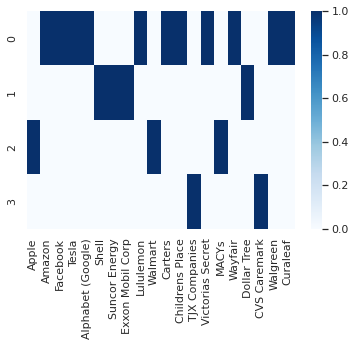

In [78]:
from sklearn.cluster import KMeans
n_clusters=4
# Perform k-means clustering with four clusters
clustering = KMeans(n_clusters=n_clusters, random_state=0).fit(correlation_mat)

# Print the cluster labels
cluster_labels=clustering.labels_

print_clusters(df_combined,cluster_labels)
cluster_results['K-means']=cluster_labels

# Method 2: Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering algorithm that iteratively merges similar clusters to form larger clusters. The algorithm starts with each object in a separate cluster and then combines the two most similar clusters at each step. 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 2: Apple, Alphabet (Google), Shell, Walmart, Carters, MACYs, Curaleaf
Cluster 0: Amazon, Childrens Place, Dollar Tree
Cluster 3: Facebook, Tesla, Exxon Mobil Corp, Lululemon, TJX Companies, Victorias Secret, CVS Caremark
Cluster 1: Suncor Energy, Wayfair, Walgreen


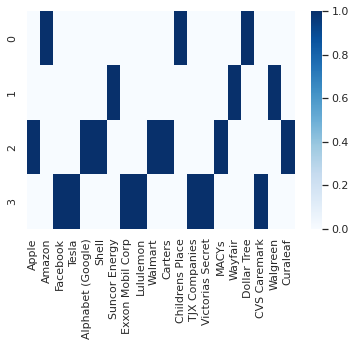

In [118]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with four clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(correlation_mat)

# Display the cluster labels
print_clusters(df_combined,clustering.labels_)
cluster_results['Agglomerative']=clustering.labels_

These results are slightly different than the results we obtained from k-means clustering. We can see some oil and gas companies has been placed in different clusters.

#Method 3: Affinity Propagation

Affinity Propagation clustering is a type of clustering algorithm that does not require the number of clusters to be specified in advance. It works by sending messages between pairs of data points, allowing the data points to automatically determine the number of clusters and the optimal clustering assignment. Affinity Propagation clustering can be effective in identifying complex patterns in data, but can also be computationally expensive for large datasets.

Cluster 3: Apple, CVS Caremark
Cluster 1: Amazon, Facebook, Tesla, Alphabet (Google), Lululemon, Carters, Childrens Place, Victorias Secret, MACYs, Wayfair, Walgreen, Curaleaf
Cluster 0: Shell, Suncor Energy, Exxon Mobil Corp, Dollar Tree
Cluster 2: Walmart, TJX Companies


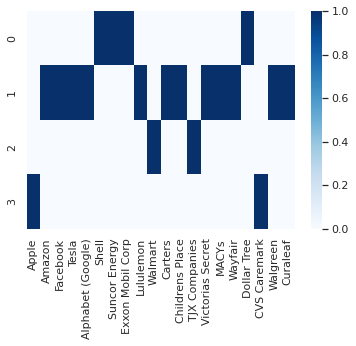

In [119]:
from sklearn.cluster import AffinityPropagation

# Load the correlation matrix (assuming it's stored in the variable correlation_mat)
# ...

# Perform affinity propagation clustering with default parameters
clustering = AffinityPropagation(affinity='precomputed').fit(correlation_mat)

# Print the cluster labels
print_clusters(df_combined,clustering.labels_)
cluster_results['Affinity']=clustering.labels_

It's interesting to see that this method found that four clusters are the optimum number of clusters for our data. Additionally, we can observe that oil and gas companies are clustered together, and some tech companies are clustered together as well.

#Method 4: Spectral Clustering

Spectral clustering is a powerful technique for clustering data that does not have a natural Euclidean structure. It works by projecting the data onto a lower-dimensional space using the eigenvalues and eigenvectors of a similarity matrix. Spectral clustering can be particularly effective for data with complex or nonlinear relationships between features

[1.21558593e+01 2.90665666e+00 1.99926885e+00 7.80575031e-01
 5.17496584e-01 4.79032798e-01 2.88888935e-01 2.18281799e-01
 1.54816217e-01 1.27577685e-01 8.69175926e-02 7.33880375e-02
 5.32140446e-02 4.57870657e-02 5.11838134e-03 1.12887997e-02
 1.82682751e-02 1.97975915e-02 2.97281044e-02 2.80382430e-02]
[1.21558593e+01 2.90665666e+00 1.99926885e+00 7.80575031e-01
 5.17496584e-01 4.79032798e-01 2.88888935e-01 2.18281799e-01
 1.54816217e-01 1.27577685e-01 8.69175926e-02 7.33880375e-02
 5.32140446e-02 4.57870657e-02 5.11838134e-03 1.12887997e-02
 1.82682751e-02 1.97975915e-02 2.97281044e-02 2.80382430e-02]
Cluster 2: Apple, Tesla, Walmart, MACYs
Cluster 0: Amazon, Facebook, Alphabet (Google), Carters, Childrens Place, Victorias Secret, Wayfair, Walgreen, Curaleaf
Cluster 1: Shell, Suncor Energy, Exxon Mobil Corp, Dollar Tree, CVS Caremark
Cluster 3: Lululemon, TJX Companies


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


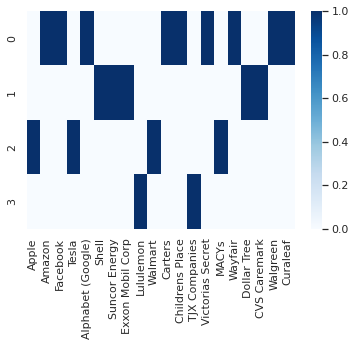

In [120]:
from sklearn.cluster import SpectralClustering

# Add a small positive constant value to the diagonal of the matrix
correlation_mat_pro = correlation_mat#+ 0.001 * np.eye(correlation_mat.shape[0])
print(np.linalg.eigvals(correlation_mat_pro))
print(np.linalg.eigvals(correlation_mat))
# Perform spectral clustering with two clusters
clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors',eigen_solver='arpack', assign_labels='kmeans').fit(correlation_mat_pro)

# Display the cluster labels
print_clusters(df_combined,clustering.labels_)

#Method 5: DBSCAN clustering

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together. It does not require specifying the number of clusters beforehand, and can identify clusters of arbitrary shapes. The algorithm is robust to outliers and noise in the data, and can automatically label them as noise points.

Cluster -1: Apple, Walmart, TJX Companies, MACYs, CVS Caremark
Cluster 0: Amazon, Facebook, Alphabet (Google), Shell, Lululemon, Carters, Childrens Place, Victorias Secret, Wayfair, Walgreen, Curaleaf
Cluster 2: Tesla, Exxon Mobil Corp
Cluster 1: Suncor Energy
Cluster 3: Dollar Tree


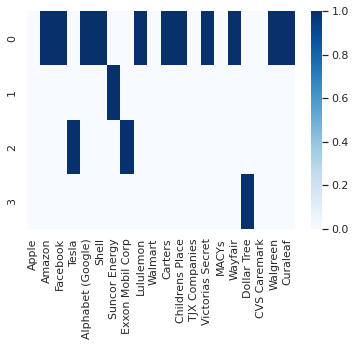

In [121]:
from sklearn.cluster import DBSCAN

# Removing negative values in correlation matrix
correlation_mat_pro = 1 + correlation_mat

# Perform DBSCAN clustering with eps=0.5 and min_samples=5
clustering = DBSCAN(eps=0.5, min_samples=5, metric='precomputed').fit(correlation_mat_pro)

# Print the cluster labels
print_clusters(df_combined,clustering.labels_)
cluster_results['DBSCAN']=clustering.labels_

#Visualization

It may be useful to look at the results of the above four clustering methods simultaneously to get an idea about their performance. The simplest method to look at the clusters would be a heatmap where companies are on the x axis and the clusters are on the y axis. Lets plot all these heatmaps near each other.

In [122]:
cluster_results

{'K-means': array([2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 3, 0, 2, 0, 1, 3, 0, 0],
       dtype=int32),
 'Agglomerative': array([2, 0, 3, 3, 2, 2, 1, 3, 3, 2, 2, 0, 3, 3, 2, 1, 0, 3, 1, 2]),
 'Affinity': array([3, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 3, 1, 1]),
 'DBSCAN': array([-1,  0,  0,  2,  0,  0,  1,  2,  0, -1,  0,  0, -1,  0, -1,  0,  3,
        -1,  0,  0])}

In [123]:

def plot_cluster_heatmaps(cluster_results, companies):
    """
    Plots the heatmaps of clustering for all companies for different methods side by side.

    Args:
    - cluster_results: a dictionary of cluster labels for each clustering method
    - companies: a list of company names
    """
    # Extract the keys and values from the dictionary
    methods = list(cluster_results.keys())
    labels = list(cluster_results.values())

    # Define the heatmap data for each method
    heatmaps = []
    for i in range(len(methods)):
        heatmap = np.zeros((len(np.unique(labels[i])), len(companies)))
        for j in range(len(companies)):
            heatmap[labels[i][j], j] = 1
        heatmaps.append(heatmap)

    # Plot the heatmaps side by side
    fig, axs = plt.subplots(nrows=1, ncols=len(methods), figsize=(8*len(methods), 8))

    for i in range(len(methods)):
        sns.heatmap(heatmaps[i], cmap="Blues", annot=True, fmt="g", xticklabels=companies, ax=axs[i])
        axs[i].set_title(methods[i])

    plt.tight_layout()
    plt.show()

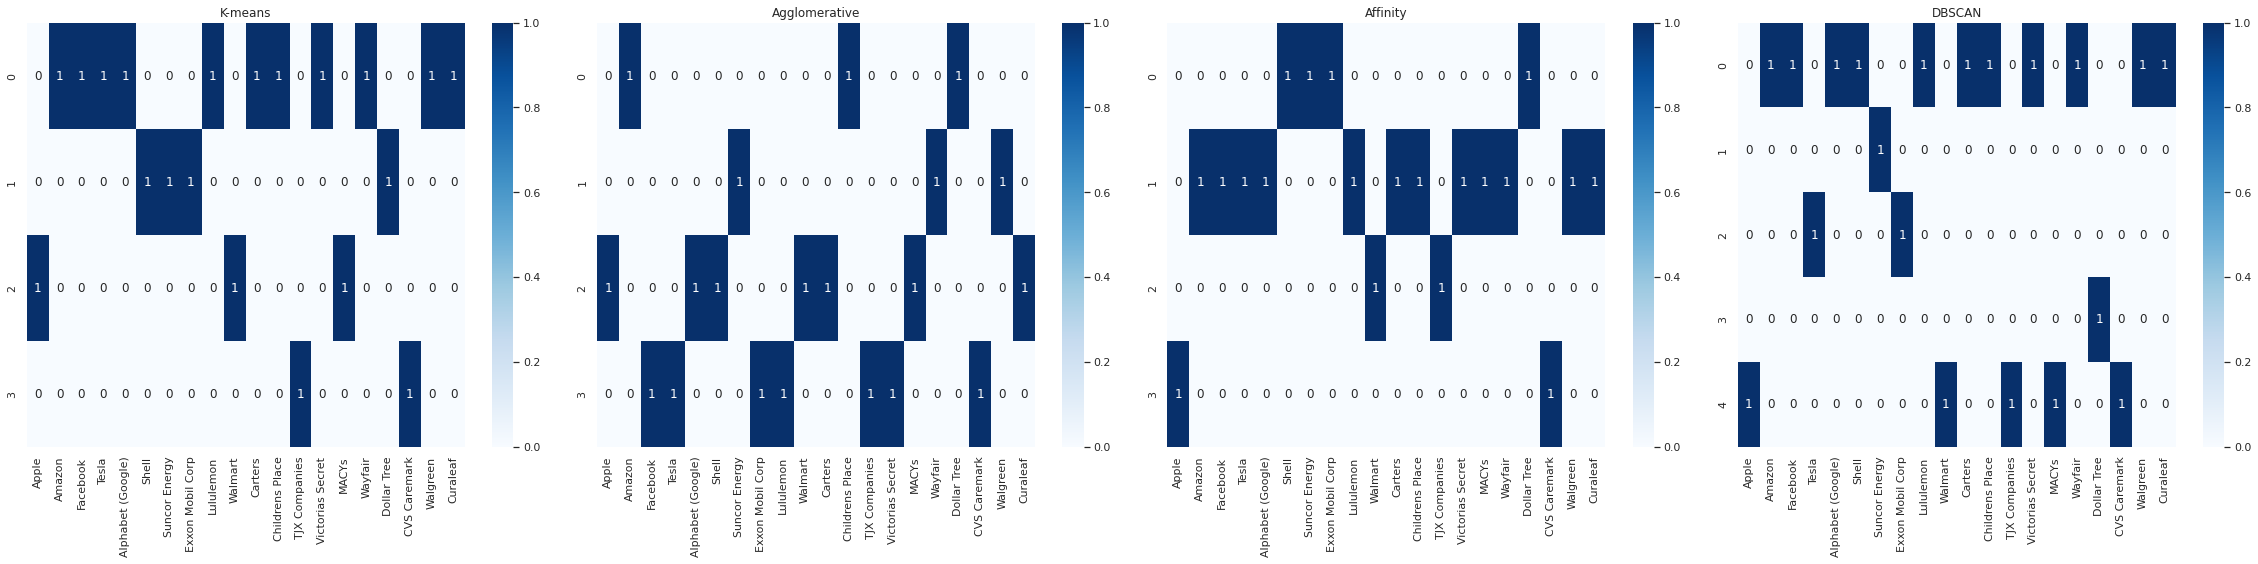

In [124]:
companies=df_combined.columns
plot_cluster_heatmaps(cluster_results, companies)

However, the above visualization is not very helpful when trying to compare the results of multiple clustering algorithms. Let's try to use a Venn diagram used visualization method to see the relationship.

#Conclusion

In this article, the author explores four different ways to cluster 20 companies based on correlation among their stock prices. The objective is to cluster these companies in a way that reflects their behavior rather than their stock price. We tried K-means clustering, Agglomerative clustering, Affinity Propagation clustering, and DBSCAN clustering methods, each with its own advantages and disadvantages. The results show that all four methods could cluster companies in a way that matches their industry or sector, and some methods are more computationally expensive than others. The correlation-based clustering method provides a useful alternative to the stock price-based clustering method, as it allows us to cluster companies based on their behavior rather than their stock price.
